In [1]:
# To allow changes in .py files to be reflected in Notebook
%load_ext autoreload
%autoreload 2

# File Imports

In [2]:
# 
from stream import Stream
# importing the anomaly injection libraries
from anomaly_intervalsStream import *
from anomaly8 import CollectiveAnomaly, PointAnomaly, SequentialAnomaly

In [3]:
# replace filepath with local filepath for data (data file must be arff file)
ECG1 = Stream('/Users/akankshanehete/Desktop/AnomalyDriftDetection/data/benchmark/ECG/MBA_ECG14046_data_1.arff')
ECG2 = Stream('/Users/akankshanehete/Desktop/AnomalyDriftDetection/data/benchmark/ECG/MBA_ECG14046_data_13.arff')
ECG3 = Stream('/Users/akankshanehete/Desktop/AnomalyDriftDetection/data/benchmark/ECG/MBA_ECG14046_data_15.arff')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


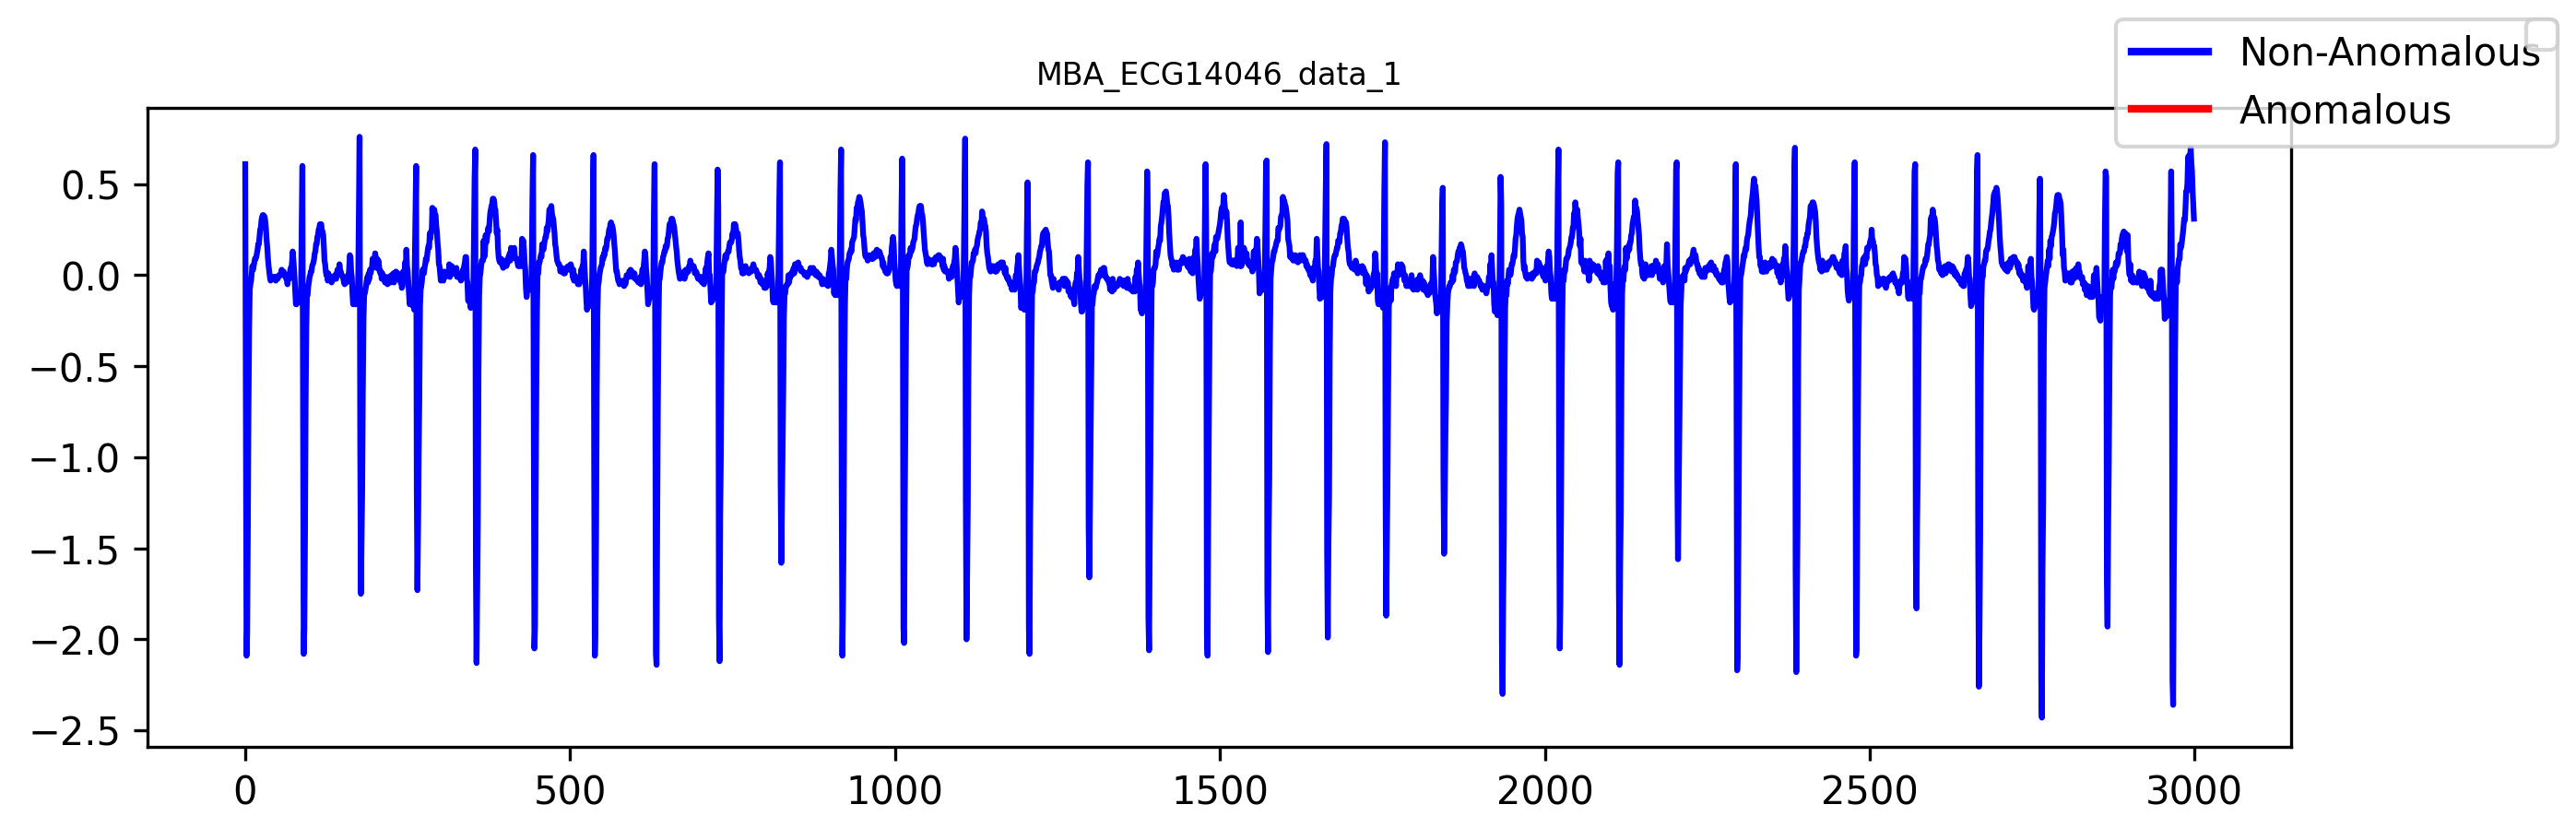

In [4]:
# importing demo dataset into Stream so it can be modified
ECGtest = Stream('/Users/akankshanehete/Desktop/AnomalyDriftDetection/util/MBA_ECG14046_data_1.arff')
# plotting demo dataset
ECGtest.plot()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


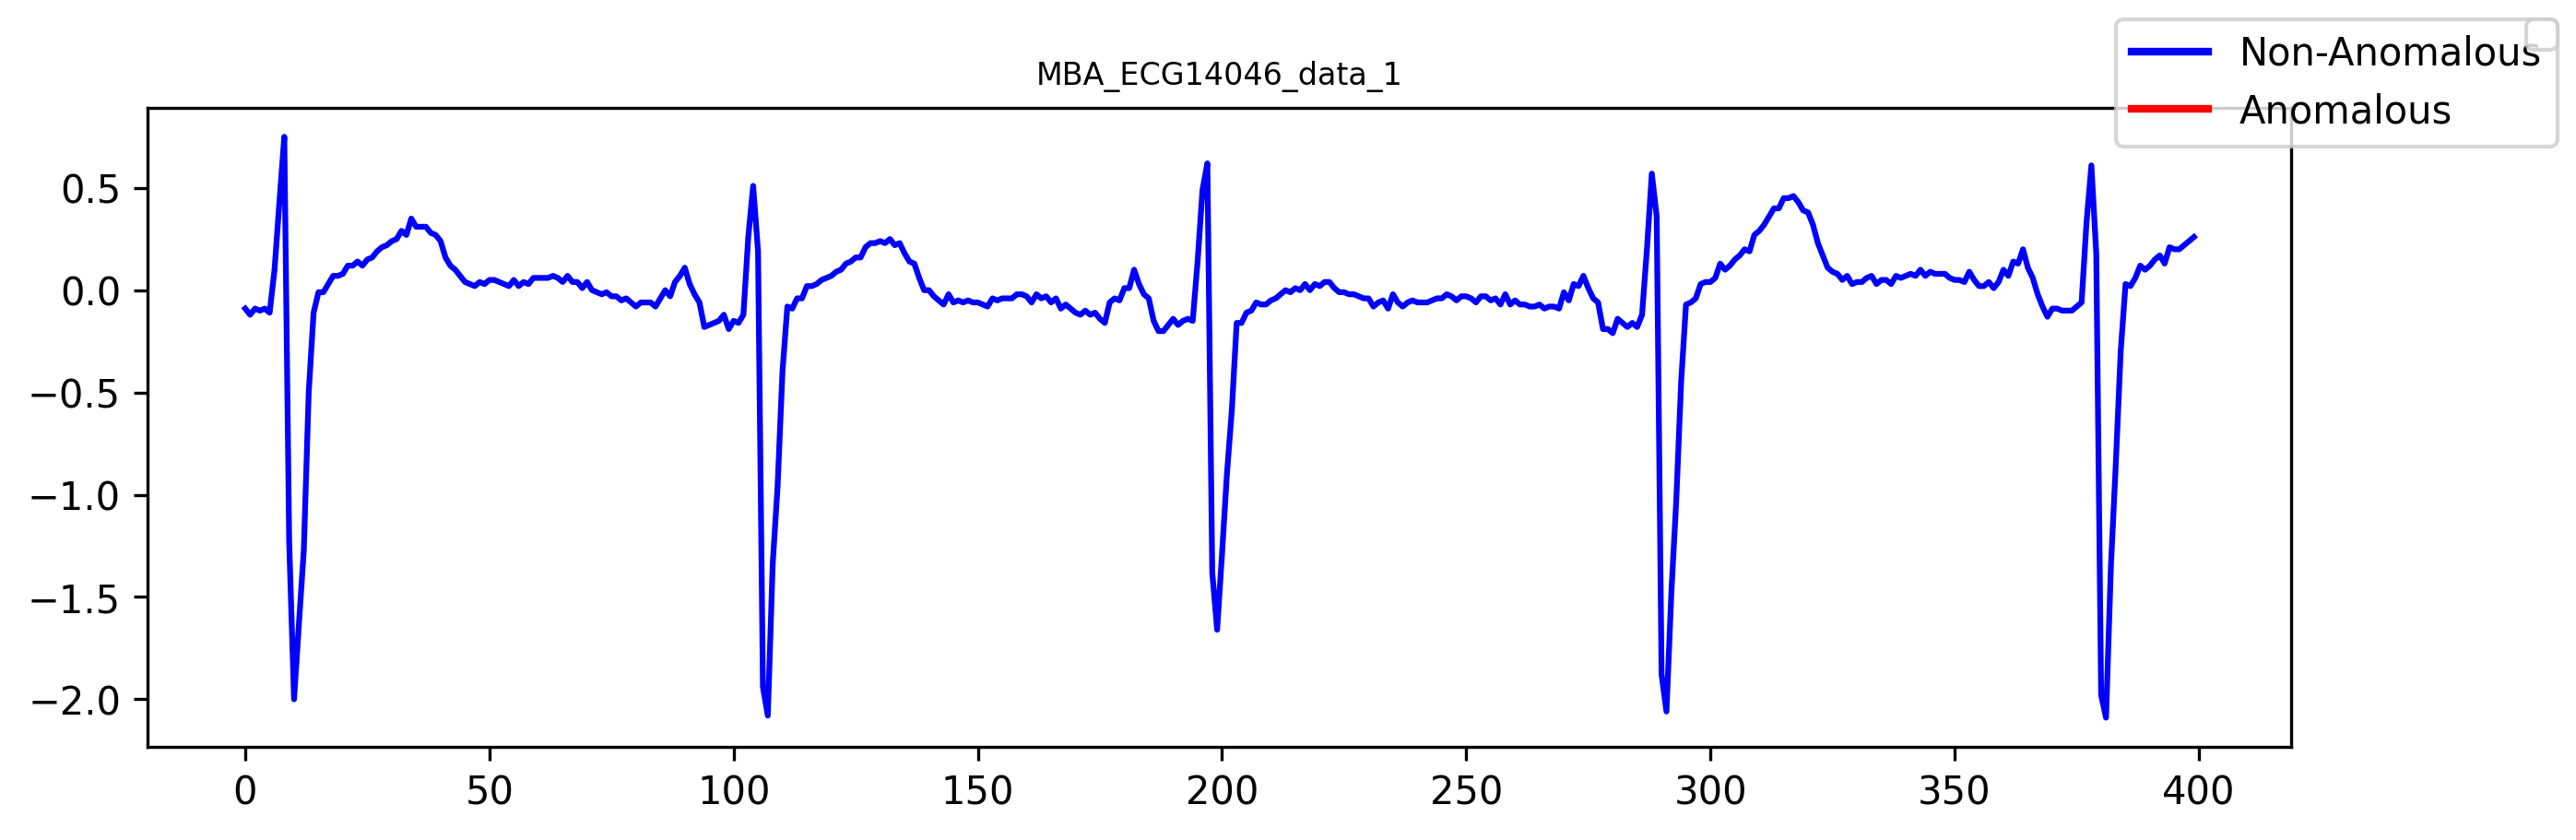

In [5]:
# plotting a portion of the dataset to get a closer look at the data
ECGtest.plot(start=1100, end=1500)

In [6]:
# creating intervals within the stream in or
ECGtestanomalies = createAnomalyIntervals(ECGtest)
# IMPORTANT NOTE: gap size cannot exceed 1/2 interval size (no anomalies will be injected as interval size will be nonexistent)
# creating 3 equally size intervals to inject anomalies into the dataset
ECGtestanomalies.create_intervals(3,100)

## Creating Customized Anomaly Modules
Each cell contains 3 customized anomaly modules that can be injected into the dataset

In [7]:
# CREATING POINT ANOMALY MODULES

# creating point anomaly module with uniform distribution of values
pPointAnom1 = PointAnomaly(0.05, distribution='uniform', num_values=100, lowerbound=-1, upperbound=1) 
# creating point anomaly module with gaussian distribution of values
pPointAnom2 = PointAnomaly(0.05, distribution='gaussian', mu=1, std=0.5, num_values=20)
# creating point anomaly module with skew distribution of values
pPointAnom3 = PointAnomaly(0.002, distribution='skew', upperbound=2, skew=0.1)


In [8]:
# CREATING COLLECTIVE ANOMALY MODULES

# creating collective anomaly module with uniform distribution of values
pCollAnom1 = CollectiveAnomaly(5, 0.1, upperbound=2, lowerbound=0, num_values=50)
# creating collective anomaly module with uniform distribution of values
pCollAnom2 = CollectiveAnomaly(20, 0.04, upperbound=2, lowerbound=0.5, num_values=200)
# creating point anomaly module with skew distribution of values
pCollAnom3 = CollectiveAnomaly(100, 0.10, num_values=50, distribution='gaussian', mu=0.1, std=0.2)

In [9]:
# CREATING SEQUENTIAL ANOMALY MODULES

# creating sequential anomaly module with length of 15 data points
pSeqAnom1 = SequentialAnomaly(0.10, 0.3, 3, length=15)
# creating sequential anomaly module with length of 30 data points
pSeqAnom2 = SequentialAnomaly(0.05, 0.5,1, length=30)
# creating sequential anomaly module with length of 50 data points
pSeqAnom3 = SequentialAnomaly(0.1, 0.1,1, length=50)

# Adding Customized Anomalies to Intervals
A number of anomaly modules corresponding to the number of intervals can be injected into the dataset. Feel free to mix and match with the ones that are created for you in the above cells, or create your own by altering the specified parameters. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


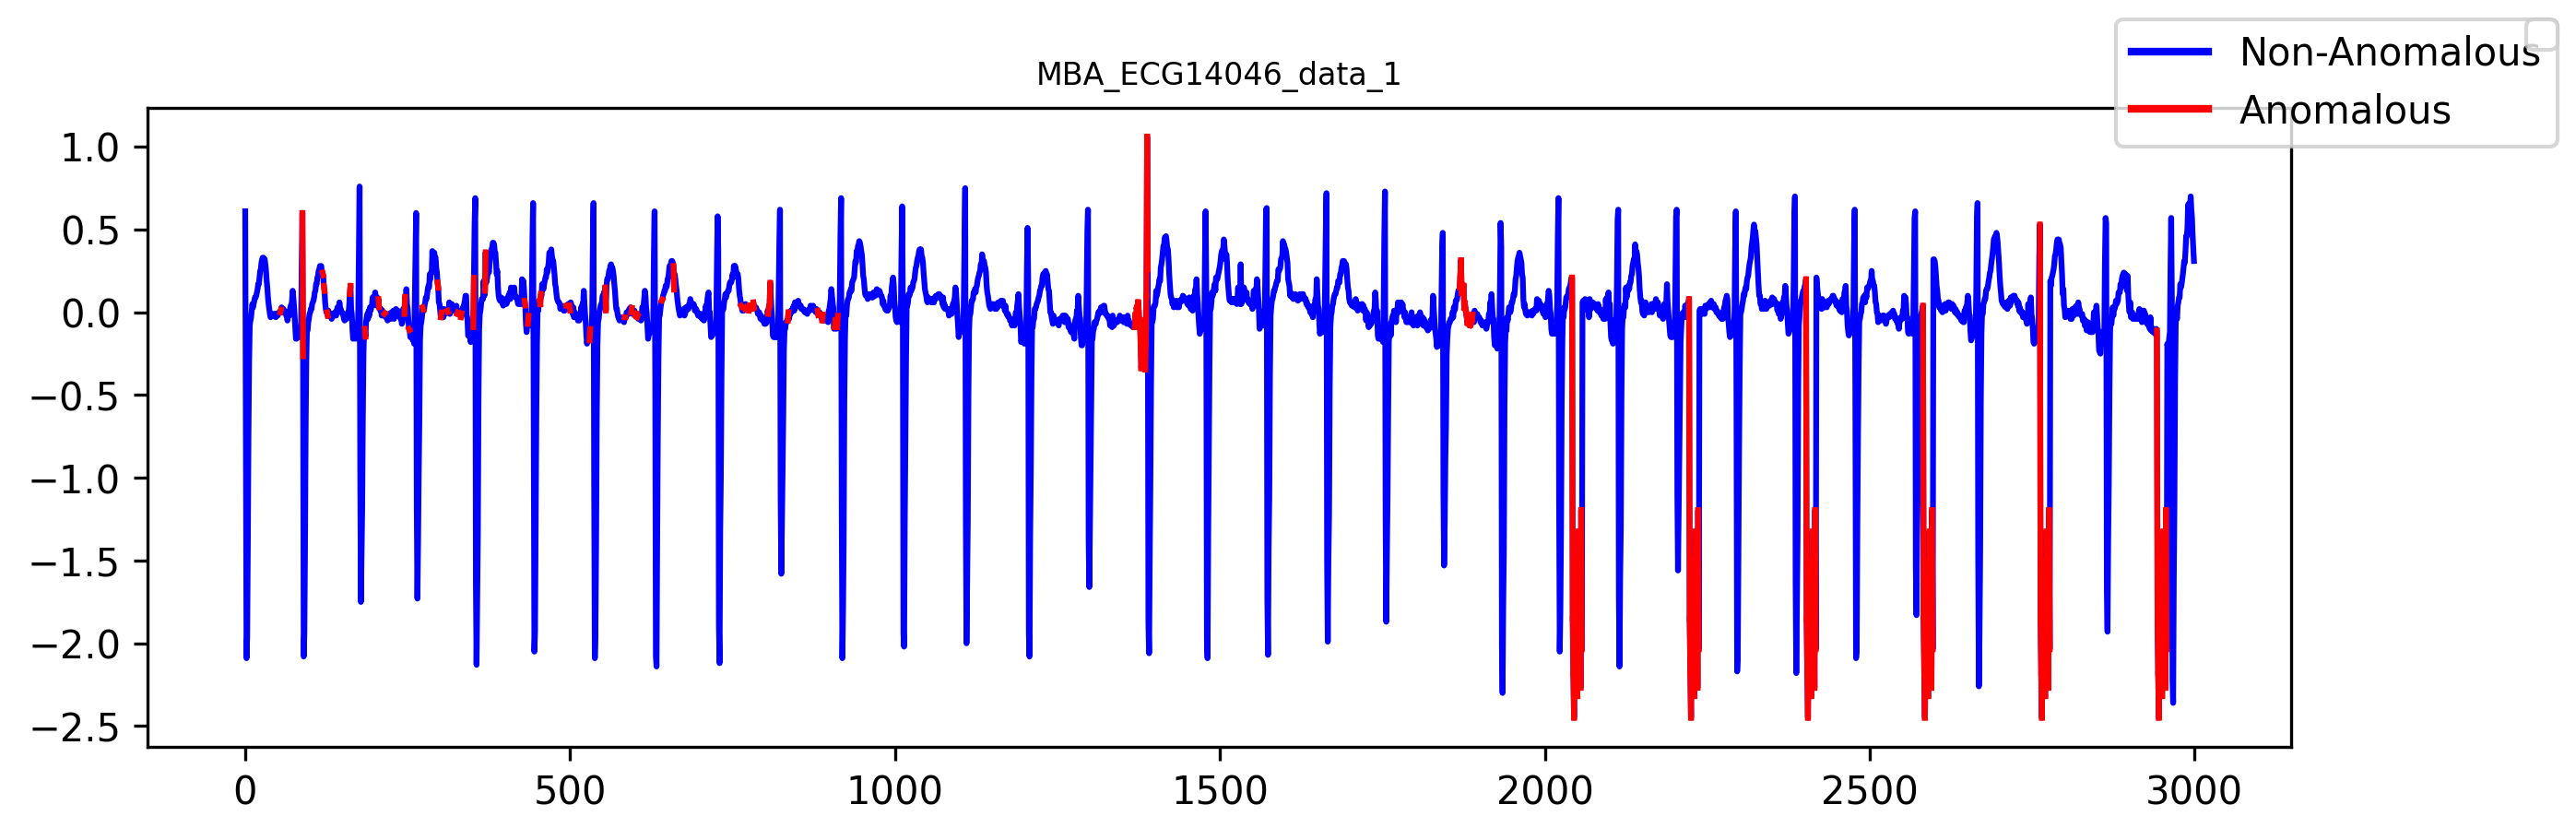

In [10]:
# add anomaly modules here corresponding to each interval created
ECGtestanomalies.add_anomalies(pPointAnom1, pCollAnom2, pSeqAnom1)
ECGtest.plot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


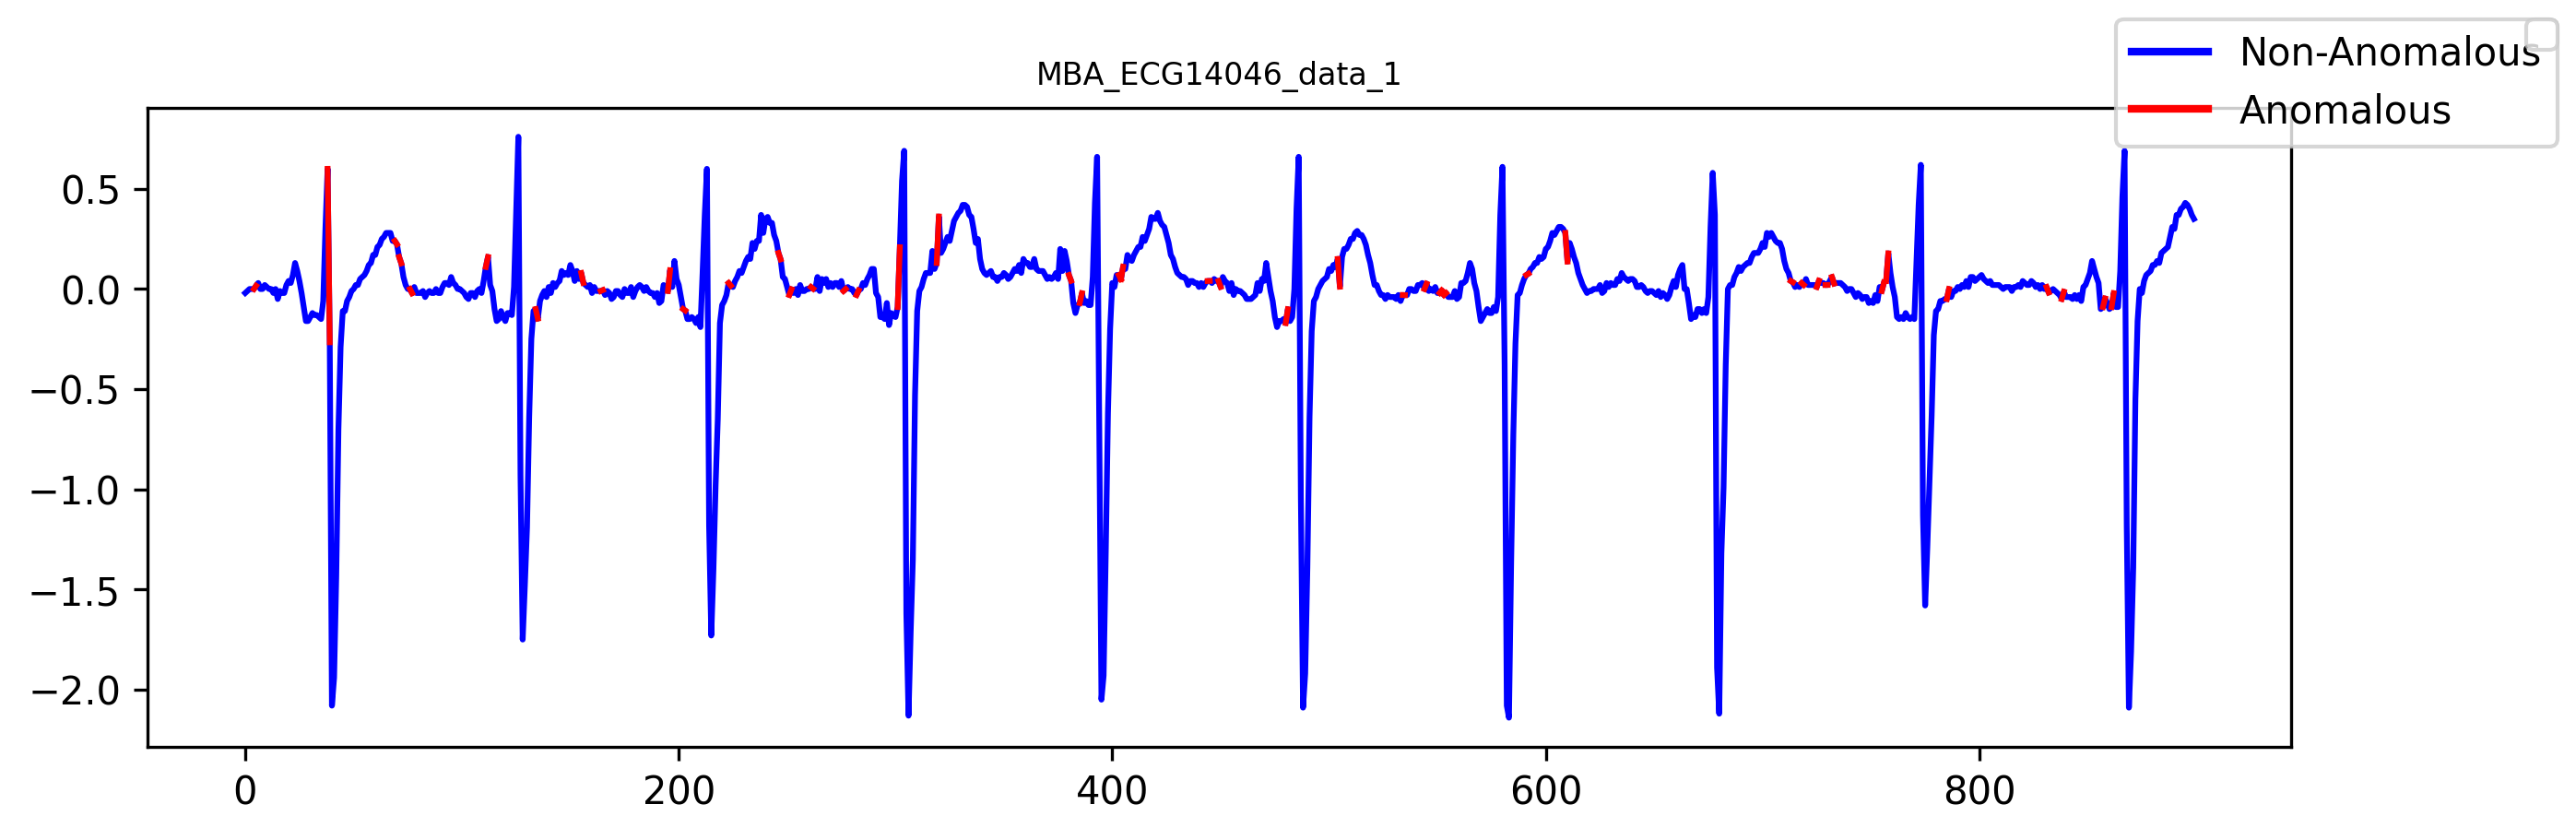

In [11]:
ECGtest.plot(start=50, end=950)

In [12]:
# convert dataset with injected anomalies into ARFF data format (into current directory)
# ECGtest.to_arff(dir='.',start=3500, end=6500)